In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import folium

In [2]:
data = pd.read_csv('listings.csv')

In [146]:
detailed = pd.read_csv('listings_detailed.csv')

/anaconda3/envs/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [147]:
detailed.cancellation_policy.value_counts()

strict_14_with_grace_period    7396
flexible                       7138
moderate                       6090
super_strict_30                 146
super_strict_60                  65
strict                            2
Name: cancellation_policy, dtype: int64

In [155]:
can_policy = detailed[['id','cancellation_policy']]

In [157]:
can_policy

,id,cancellation_policy
0,6369,flexible
1,21853,strict_14_with_grace_period
2,24805,moderate
3,24836,moderate
4,26825,strict_14_with_grace_period
...,...,...
20832,38725567,strict_14_with_grace_period
20833,38726351,flexible
20834,38727654,moderate
20835,38728727,flexible


In [169]:
data = data.join(can_policy.set_index('id'), on='id')

In [175]:
data

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,cancellation_policy
0,Chamartín,40.45628,-3.67763,Private room,70,1,65,0.56,1,53,flexible
1,Latina,40.40341,-3.74084,Private room,17,4,33,0.55,2,48,strict_14_with_grace_period
2,Centro,40.42202,-3.70395,Entire home/apt,80,5,2,0.03,1,354,moderate
3,Centro,40.41995,-3.69764,Entire home/apt,115,3,64,0.63,1,301,moderate
4,Arganzuela,40.38985,-3.69011,Private room,25,2,136,1.19,1,337,strict_14_with_grace_period
...,...,...,...,...,...,...,...,...,...,...,...
20832,Chamartín,40.47847,-3.68395,Entire home/apt,100,1,0,NaN,4,108,strict_14_with_grace_period
20833,Puente de Vallecas,40.38533,-3.63968,Private room,24,2,0,NaN,4,74,flexible
20834,Centro,40.42182,-3.70336,Entire home/apt,75,2,0,NaN,2,196,moderate
20835,Centro,40.40896,-3.70107,Entire home/apt,45,2,0,NaN,1,104,flexible


In [173]:
to_drop = ['id', 'name', 'host_id', 'host_name', 'last_review', 'neighbourhood']
data.drop(to_drop,axis=1,inplace=True)

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             20837 non-null  object 
 1   latitude                        20837 non-null  float64
 2   longitude                       20837 non-null  float64
 3   room_type                       20837 non-null  object 
 4   price                           20837 non-null  int64  
 5   minimum_nights                  20837 non-null  int64  
 6   number_of_reviews               20837 non-null  int64  
 7   reviews_per_month               16183 non-null  float64
 8   calculated_host_listings_count  20837 non-null  int64  
 9   availability_365                20837 non-null  int64  
 10  cancellation_policy             20837 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 1.7+ MB


In [49]:
data.isnull().sum()

id                                   0
name                                 5
host_id                              0
host_name                           15
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4654
reviews_per_month                 4654
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [50]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.083700e+04,2.083700e+04,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,16183.000000,20837.000000,20837.000000
mean,2.356026e+07,1.014144e+08,40.420548,-3.694500,134.065364,4.373614,35.163891,1.958974,12.188559,155.097567
std,1.083667e+07,8.956078e+07,0.021881,0.027793,381.207575,20.428777,61.863053,1.967925,32.156130,133.746263
min,6.369000e+03,5.154000e+03,40.319480,-3.890940,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.608985e+07,2.232182e+07,40.409550,-3.707490,40.000000,1.000000,1.000000,0.430000,1.000000,17.000000
50%,2.459474e+07,7.574288e+07,40.418900,-3.701180,65.000000,2.000000,8.000000,1.280000,2.000000,123.000000
75%,3.401318e+07,1.719263e+08,40.429020,-3.689110,100.000000,3.000000,42.000000,2.940000,7.000000,300.000000
max,3.873002e+07,2.960847e+08,40.573990,-3.527660,9999.000000,1125.000000,594.000000,34.230000,231.000000,365.000000


In [60]:
data.corr().price.sort_values(ascending=False)[1:]

id                                0.116168
host_id                           0.089004
availability_365                  0.064610
longitude                         0.063276
calculated_host_listings_count    0.046914
latitude                          0.043225
minimum_nights                   -0.015241
reviews_per_month                -0.056573
number_of_reviews                -0.089585
Name: price, dtype: float64

In [4]:
data.neighbourhood_group.value_counts()

Centro                   9773
Salamanca                1375
Chamberí                 1331
Arganzuela               1121
Tetuán                    838
Carabanchel               678
Retiro                    665
Latina                    616
Ciudad Lineal             613
Puente de Vallecas        591
Chamartín                 551
Moncloa - Aravaca         542
San Blas - Canillejas     524
Usera                     361
Hortaleza                 332
Fuencarral - El Pardo     300
Villaverde                166
Barajas                   165
Moratalaz                 127
Villa de Vallecas         103
Vicálvaro                  65
Name: neighbourhood_group, dtype: int64

In [5]:
data.neighbourhood.value_counts()

Embajadores      2690
Universidad      1996
Palacio          1505
Sol              1371
Justicia         1207
                 ... 
Pavones             5
El Plantío          5
El Pardo            4
Fuentelareina       3
Atalaya             3
Name: neighbourhood, Length: 127, dtype: int64

In [8]:
lat = data.latitude.mean()
long = data.longitude.mean()

In [9]:
long

-3.694500479915535

In [10]:
madrid_map = folium.Map(location=[lat, long], zoom_start=11)

In [61]:
madrid_price_mean = data.groupby('neighbourhood_group').mean().price.reset_index()
madrid_price_median = data.groupby('neighbourhood_group').median().price.reset_index()

In [18]:
madrid_price

,neighbourhood_group,price
0,Arganzuela,93.807315
1,Barajas,132.430303
2,Carabanchel,80.109145
3,Centro,129.875883
4,Chamartín,140.954628
5,Chamberí,124.414726
6,Ciudad Lineal,115.535073
7,Fuencarral - El Pardo,138.526667
8,Hortaleza,164.340361
9,Latina,125.724026


In [ ]:
gj = "neighbourhoods.geojson"

folium.Choropleth(
    geo_data=gj,
    name='choropleth',
    data=madrid_price_median,
    columns=['neighbourhood_group', 'price'],
    key_on='feature.properties.neighbourhood_group',
    fill_color='RdBu_r',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend = "Median Price (Euro)"
).add_to(madrid_map)

folium.LayerControl().add_to(madrid_map)

madrid_map

Text(0.5, 1.0, 'Madrid AirBnB Price distribution')

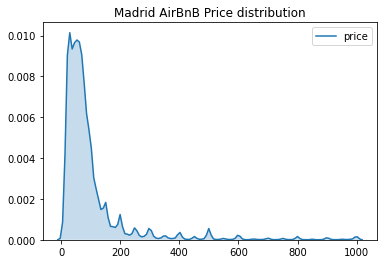

In [64]:
sns.kdeplot(data.price, shade=True, clip=(0, 1000))
plt.title("Madrid AirBnB Price distribution")

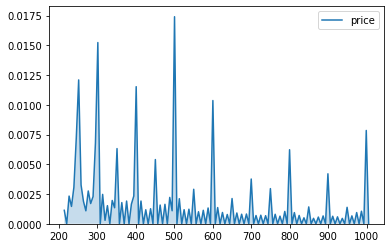

In [77]:
sns.kdeplot(data.price, bw=2, shade=True, clip=(220, 1000))

In [90]:
data[data['neighbourhood_group']=='Barajas'].price

236       78
314       29
389       28
406      110
477       30
        ... 
20411     48
20412     47
20469     16
20667     50
20825     48
Name: price, Length: 165, dtype: int64

In [ ]:
data['neighbourhood_group']=='Barajas'

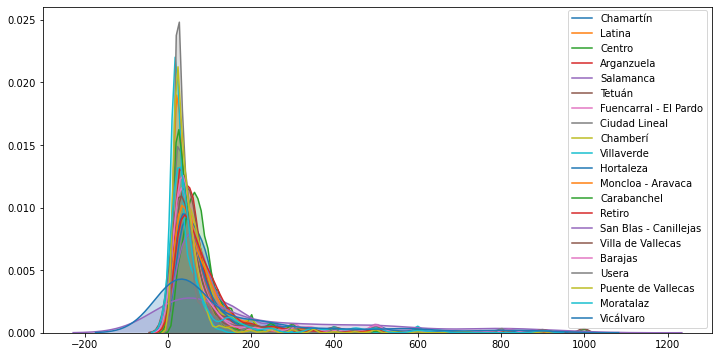

In [96]:
plt.figure(figsize=(12, 6))
for i in data.neighbourhood_group.unique()[0:]:
    sns.kdeplot(data[data['neighbourhood_group']==i].price, shade=True, clip=(0, 1000), label = i)

([<matplotlib.axis.XTick at 0x12042fb00>,
 <a list of 3 Text major ticklabel objects>)

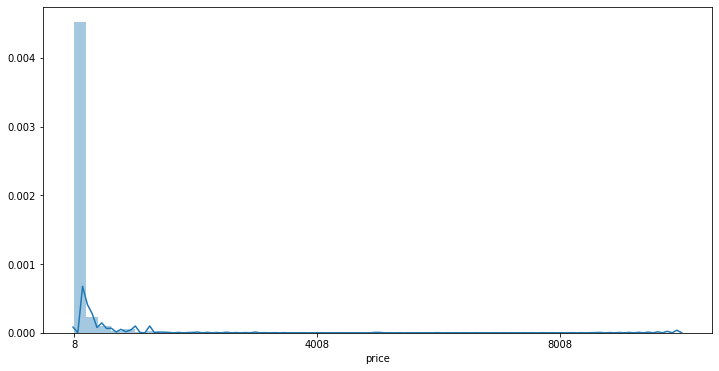

In [46]:
plt.figure(figsize=(12, 6))
sns.distplot(data['price'])
plt.xticks(np.arange(data['price'].min(), data['price'].max(), step=4000))

([<matplotlib.axis.XTick at 0x120471f28>,
 <a list of 3 Text major ticklabel objects>)

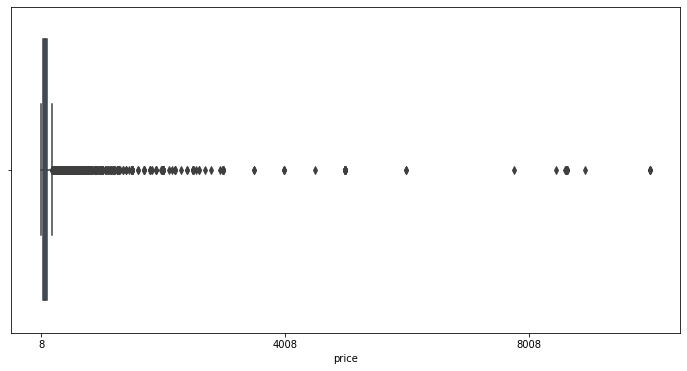

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(data['price'])
plt.xticks(np.arange(data['price'].min(), data['price'].max(), step=4000))

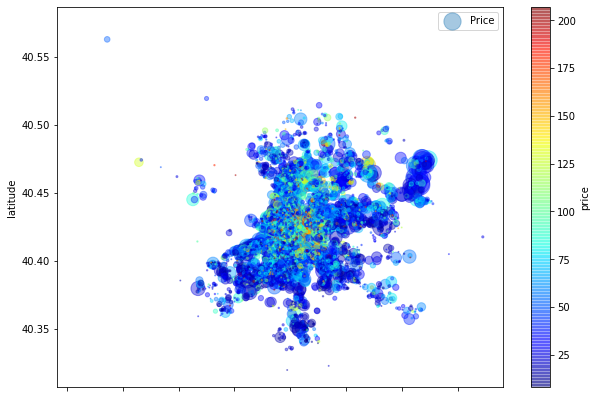

In [83]:
d.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
            s = d.number_of_reviews, c = 'price', label = 'Price', figsize = (10,7),
            cmap = plt.get_cmap('jet'), colorbar = True)

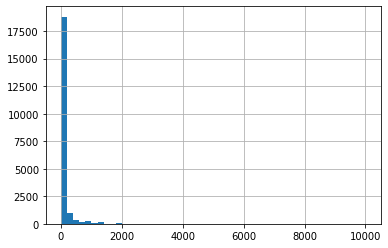

In [44]:
data.price.hist(bins = 50)

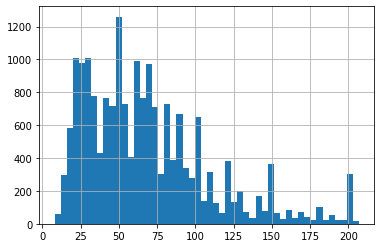

In [52]:
data[data['price']>1000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2043,6681279,Fantastico Piso Barrio de Salamanca,34972297,Juan Andres,Salamanca,Castellana,40.43447,-3.68226,Entire home/apt,1890,1,0,NaN,NaN,1,0
4236,13750696,Apartamento en el centro!!\nGay friendly!!,8275478,Alberto,Centro,Universidad,40.42952,-3.71043,Entire home/apt,1200,1,1,2016-06-29,0.03,1,0
4813,15203472,Luminous apt in the heart of Madrid :),1225360,Pablo,Arganzuela,Delicias,40.39569,-3.69496,Entire home/apt,8465,2,0,NaN,NaN,1,0
6789,18942744,Habitación,132052020,Sofia,Salamanca,Lista,40.43339,-3.67547,Private room,1788,50,0,NaN,NaN,1,363
7226,19382446,"House with terrace in Alonso Martinez, Madrid.",9863470,Enrique,Chamberí,Trafalgar,40.42906,-3.69894,Private room,1200,2,0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20479,38224838,Dúplex en calle de Santoña cerca de Rafael Ybarra,206349691,Mike,Usera,Zofío,40.38234,-3.71170,Entire home/apt,1262,1,0,NaN,NaN,124,274
20528,38306703,Exterior apartment with A/C near Rafaela Ibarr...,206349691,Mike,Usera,Zofío,40.38231,-3.71324,Entire home/apt,1262,1,0,NaN,NaN,124,350
20549,38337417,Exterior Facing Studio With Bay Window & A/C (...,206349691,Mike,Chamberí,Trafalgar,40.42940,-3.70005,Entire home/apt,1262,1,0,NaN,NaN,124,248
20710,38590623,Duplex near Rafaela Ibarra with A/C (SANB3),206349691,Mike,Usera,Zofío,40.38293,-3.71248,Entire home/apt,1262,1,0,NaN,NaN,124,365


In [177]:
data['neighbourhood_group'].nunique()

21

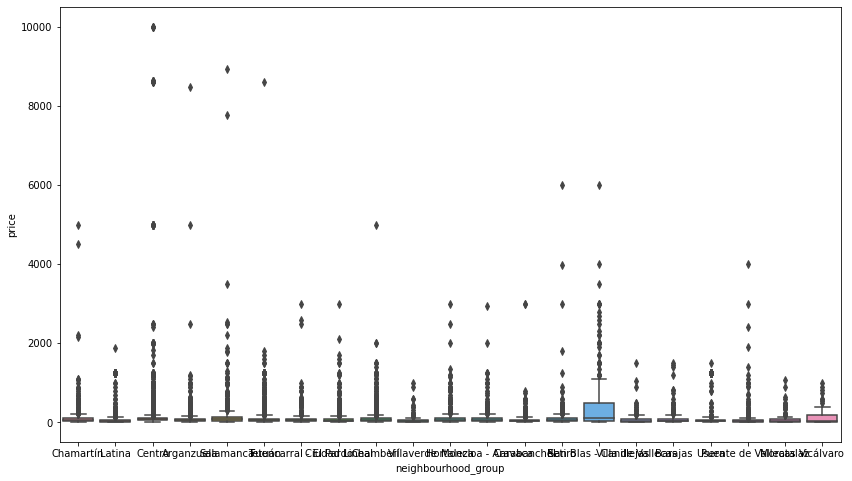

In [176]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=data['neighbourhood_group'], y=data['price'])

In [186]:
def box_plot():
    plt.figure(figsize=(18, 11))
    k = 1
    for i in data['neighbourhood_group'].unique()[0:6]:
        plt.subplot(2, 3, k)
        plt.title(i)
        df = data[data['neighbourhood_group'] == i]
        sns.boxplot(df['price'])
        plt.xticks(np.arange(df['price'].min(), df['price'].max(), step=500))
        k += 1

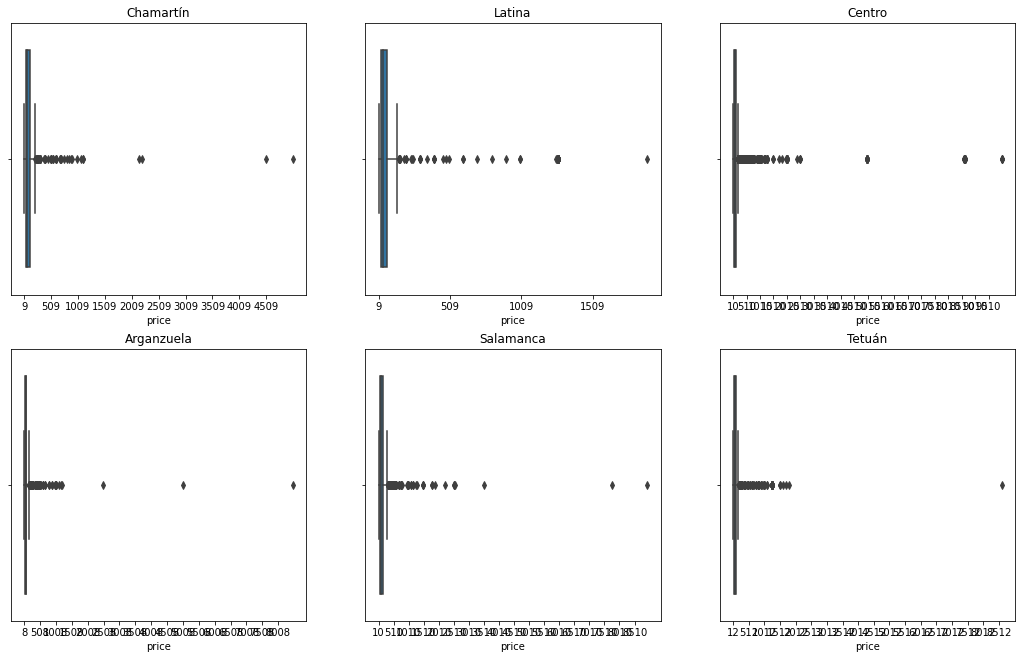

In [187]:
box_plot()

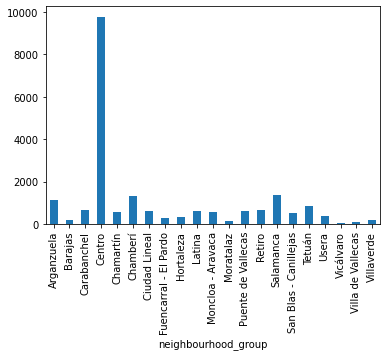

In [82]:
data.groupby('neighbourhood_group').agg('count').id.plot(kind='bar')

In [105]:
data[['latitude', 'longitude', 'neighbourhood_group', 'price']].query("price < 40")

,latitude,longitude,neighbourhood_group,price
1,40.40341,-3.74084,Latina,17
4,40.38985,-3.69011,Arganzuela,25
24,40.42462,-3.70352,Centro,32
25,40.45559,-3.69421,Tetuán,25
28,40.43331,-3.64355,Ciudad Lineal,20
...,...,...,...,...
20823,40.49417,-3.69383,Fuencarral - El Pardo,35
20828,40.37534,-3.77340,Latina,20
20829,40.42727,-3.65315,Ciudad Lineal,22
20831,40.42483,-3.71172,Centro,23


In [118]:
map_1 = folium.Map(location=[lat, long], zoom_start=12, )

for index, row in data[['latitude', 'longitude', 'neighbourhood_group', 'price']].query("price < 40").iterrows():
    label = folium.Popup(f'{row["price"]:.2f} euro')
    folium.CircleMarker(
        [row["latitude"], row["longitude"]],
        radius=5,
        popup=label,
        color="green",
        fill=True,
        fill_color="green",
        fill_opacity=0.7,
        parse_html=False).add_to(map_1)  
for index, row in data[['latitude', 'longitude', 'neighbourhood_group', 'price']].query("price > 1000").iterrows():
    label = folium.Popup(f'{row["price"]:.2f} euro')
    folium.CircleMarker(
        [row["latitude"], row["longitude"]],
        radius=5,
        popup=label,
        color="black",
        fill=True,
        fill_color="red",
        fill_opacity=0.7,
        parse_html=False).add_to(map_1)

In [ ]:
box_plot()

Text(0.5, 1.0, 'AirBnB Price per Room Type')

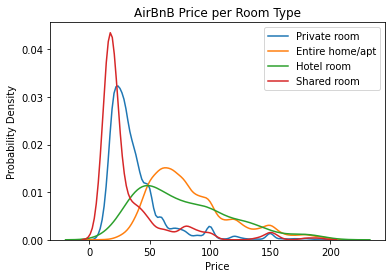

In [123]:
for room in data.room_type.unique():
    sns.kdeplot(data[data.room_type==room].price, shade=False, clip=(0, 200), Label=room)
  
plt.xlabel('Price') 
plt.ylabel('Probability Density') 
plt.title('AirBnB Price per Room Type')

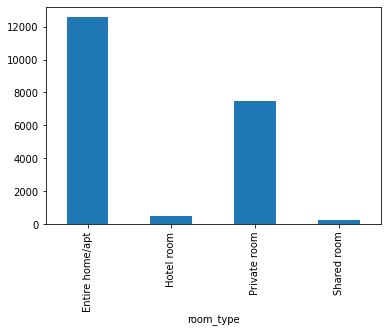

In [124]:
data.groupby('room_type').agg('count').id.plot(kind='bar')

In [188]:
n_group = data.groupby('neighbourhood_group')['price']

In [189]:
# Quantile 1 = 25% of data
Q1 = n_group.quantile(.25)
Q3 = n_group.quantile(.75)

In [192]:
# IQR = Interquartile Range
IQR = Q3 - Q1

# Limits
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [210]:
new_df = pd.DataFrame()

for i in n_group.groups.keys():
    hood = data['neighbourhood_group'] == i
    accepted_limit = (
                    (data['price']>=lower[i]) & (data['price']<=upper[i])
                    )
    selected = hood & accepted_limit
    selected_df = data[selected]
    new_df = pd.concat([new_df, selected_df])

In [211]:
new_df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,cancellation_policy
4,Arganzuela,40.38985,-3.69011,Private room,25,2,136,1.19,1,337,strict_14_with_grace_period
111,Arganzuela,40.39548,-3.69392,Entire home/apt,115,2,42,1.94,5,55,moderate
122,Arganzuela,40.40522,-3.69454,Entire home/apt,65,3,30,0.36,1,137,moderate
136,Arganzuela,40.40266,-3.70374,Private room,24,6,137,1.59,4,227,strict_14_with_grace_period
139,Arganzuela,40.40442,-3.69256,Entire home/apt,70,5,28,0.31,1,140,moderate
...,...,...,...,...,...,...,...,...,...,...,...
20683,Villaverde,40.32252,-3.66562,Private room,22,1,1,1.00,1,174,flexible
20753,Villaverde,40.32093,-3.70369,Private room,57,3,0,NaN,1,3,flexible
20764,Villaverde,40.36001,-3.69004,Private room,25,1,0,NaN,3,353,flexible
20807,Villaverde,40.31948,-3.70278,Private room,15,2,1,1.00,1,31,flexible


In [216]:
new_df.price.max()

1100

In [224]:
def box_plot():
    plt.figure(figsize=(18, 11))
    k = 1
    for i in new_df['neighbourhood_group'].unique()[13:19]:
        plt.subplot(2, 3, k)
        plt.title(i)
        df = data[data['neighbourhood_group'] == i]
        sns.boxplot(df['price'])
        plt.xticks(np.arange(df['price'].min(), df['price'].max(), step=500))
        k += 1

In [231]:
new_df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,cancellation_policy
4,Arganzuela,40.38985,-3.69011,Private room,25,2,136,1.19,1,337,strict_14_with_grace_period
111,Arganzuela,40.39548,-3.69392,Entire home/apt,115,2,42,1.94,5,55,moderate
122,Arganzuela,40.40522,-3.69454,Entire home/apt,65,3,30,0.36,1,137,moderate
136,Arganzuela,40.40266,-3.70374,Private room,24,6,137,1.59,4,227,strict_14_with_grace_period
139,Arganzuela,40.40442,-3.69256,Entire home/apt,70,5,28,0.31,1,140,moderate
...,...,...,...,...,...,...,...,...,...,...,...
20683,Villaverde,40.32252,-3.66562,Private room,22,1,1,1.00,1,174,flexible
20753,Villaverde,40.32093,-3.70369,Private room,57,3,0,NaN,1,3,flexible
20764,Villaverde,40.36001,-3.69004,Private room,25,1,0,NaN,3,353,flexible
20807,Villaverde,40.31948,-3.70278,Private room,15,2,1,1.00,1,31,flexible
